In [3]:
import torch
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.get_device_name(0))  # Your GPU name


True
NVIDIA GeForce RTX 4050 Laptop GPU


In [4]:
print(torch.cuda.get_device_name(0))
print("Running on:", torch.cuda.current_device())
a = torch.rand(10000, 10000).to("cuda")
b = torch.mm(a, a)
print("Boom. Matrix multiplied on GPU.")


NVIDIA GeForce RTX 4050 Laptop GPU
Running on: 0
Boom. Matrix multiplied on GPU.


In [5]:
print(f"GPU Available: {torch.cuda.is_available()}")
print(f"GPU Name: {torch.cuda.get_device_name(0)}")
print(f"Memory Allocated: {torch.cuda.memory_allocated() // 1024**2} MB")


GPU Available: True
GPU Name: NVIDIA GeForce RTX 4050 Laptop GPU
Memory Allocated: 772 MB


In [6]:
# flex_gpu_demo.ipynb — CUDA GPU Flex Notebook for Maximum Swagger

import time

print("🔍 Checking CUDA Availability...")
if torch.cuda.is_available():
    print("✅ CUDA is available!")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"Memory Allocated: {torch.cuda.memory_allocated() // 1024**2} MB")
else:
    print("❌ CUDA not available. Are you on a MacBook?")
    exit()

print("\n⚡ Matrix Multiplication Benchmark (10,000 x 10,000)...")
dev = torch.device("cuda")
start = time.time()
a = torch.randn(10000, 10000, device=dev)
b = torch.mm(a, a)
torch.cuda.synchronize()
print(f"✅ Done in {round(time.time() - start, 4)} seconds.")

print("\n🧠 Neural Net Warm-up (128x1000 x 2 layers)...")
model = torch.nn.Sequential(
    torch.nn.Linear(1000, 1000),
    torch.nn.ReLU(),
    torch.nn.Linear(1000, 1000)
).to(dev)
x = torch.randn(128, 1000).to(dev)

start = time.time()
for _ in range(100):
    out = model(x)
torch.cuda.synchronize()
print(f"✅ 100 forward passes done in {round(time.time() - start, 4)} seconds.")

print("\n🎯 Flex complete. GPU supremacy confirmed.")


🔍 Checking CUDA Availability...
✅ CUDA is available!
GPU Name: NVIDIA GeForce RTX 4050 Laptop GPU
Memory Allocated: 772 MB

⚡ Matrix Multiplication Benchmark (10,000 x 10,000)...
✅ Done in 0.5579 seconds.

🧠 Neural Net Warm-up (128x1000 x 2 layers)...
✅ 100 forward passes done in 0.0526 seconds.

🎯 Flex complete. GPU supremacy confirmed.


In [10]:
import torch
import time

# Set the device — CUDA (NVIDIA) or MPS (Apple Silicon) if available
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Running on: {device}")

# Matrix size (increase for more load)
N = 16000 # 4096 is fine too if 8192 causes memory error

# Create large random matrices
A = torch.randn(N, N, device=device)
B = torch.randn(N, N, device=device)

# Warm-up run (important for accurate timing on GPU)
C = torch.matmul(A, B)
torch.cuda.synchronize() if device.type == 'cuda' else None

# Time it
start = time.time()
C = torch.matmul(A, B)
torch.cuda.synchronize() if device.type == 'cuda' else None
end = time.time()

print(f"Time taken for {N}x{N} matmul: {end - start:.4f} seconds")

Running on: cuda
Time taken for 16000x16000 matmul: 1.5741 seconds


In [11]:
torch.backends.mps.is_available()

False

🔍 Testing Devices:
 - cpu
 - cuda
⏱️ cpu - 512x512 matmul...
⏱️ cpu - 1024x1024 matmul...
⏱️ cpu - 2048x2048 matmul...
⏱️ cpu - 4096x4096 matmul...
⏱️ cpu - 8192x8192 matmul...
⏱️ cuda - 512x512 matmul...
⏱️ cuda - 1024x1024 matmul...
⏱️ cuda - 2048x2048 matmul...
⏱️ cuda - 4096x4096 matmul...
⏱️ cuda - 8192x8192 matmul...


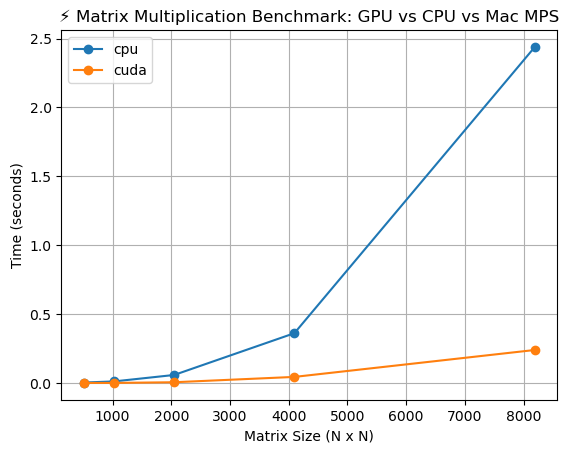

In [12]:
import torch
import time
import matplotlib.pyplot as plt

# Check devices
devices = [torch.device("cpu")]
if torch.backends.mps.is_available():
    devices.append(torch.device("mps"))
if torch.cuda.is_available():
    devices.append(torch.device("cuda"))

print("🔍 Testing Devices:")
for d in devices:
    print(" -", d)

# Matrix sizes to test
sizes = [512, 1024, 2048, 4096, 8192]
results = {str(d): [] for d in devices}

def benchmark(device, size):
    A = torch.randn(size, size, device=device)
    B = torch.randn(size, size, device=device)

    # Warm-up
    _ = torch.matmul(A, B)
    if device.type == 'cuda':
        torch.cuda.synchronize()
    elif device.type == 'mps':
        torch.mps.synchronize()

    # Timed run
    start = time.time()
    _ = torch.matmul(A, B)
    if device.type == 'cuda':
        torch.cuda.synchronize()
    elif device.type == 'mps':
        torch.mps.synchronize()
    end = time.time()

    return end - start

# Run benchmark
for d in devices:
    for sz in sizes:
        print(f"⏱️ {d} - {sz}x{sz} matmul...")
        t = benchmark(d, sz)
        results[str(d)].append(t)

# Plot
for label, times in results.items():
    plt.plot(sizes, times, marker='o', label=label)

plt.xlabel("Matrix Size (N x N)")
plt.ylabel("Time (seconds)")
plt.title("⚡ Matrix Multiplication Benchmark: GPU vs CPU vs Mac MPS")
plt.legend()
plt.grid(True)
plt.show()
